In [3]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import shap
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from operator import itemgetter
from PIL import Image
import os
from scipy.io import loadmat
import xgboost
import plotly.express as px
from scipy.signal import find_peaks

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Guide
# RIM: per capita crime rate by town
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: nitric oxides concentration (parts per 10 million)
# RM: average number of rooms per dwelling
# AGE: proportion of owner-occupied units built prior to 1940
# DIS: weighted distances to ﬁve Boston employment centers
# RAD: index of accessibility to radial highways
# TAX: full-value property-tax rate per $10,000
# PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [9]:
## One Hot Encoding ##
## Converting Collums to Category ##
df['chas'] = df['chas'].astype('category')

df['chas_new'] = df['chas'].cat.codes


enc = OneHotEncoder()

enc_data = pd.DataFrame(enc.fit_transform(df[['chas_new']]).toarray()) 

new_df = df.join(enc_data)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    
new_df = new_df.rename(columns={'chas_new': 'Type of Chas'})

del new_df['chas']

In [10]:
new_df

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,Type of Chas,0,1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,1.0,0.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,1.0,0.0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0,1.0,0.0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0,1.0,0.0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,1.0,0.0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,1.0,0.0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,1.0,0.0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,1.0,0.0


In [7]:
y = new_df['crim']
x = new_df.drop(['crim'], axis = 1) 
x.columns = x.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

regr = LinearRegression().fit(X_test, y_test)
print(regr.score(X_test, y_test))

y_predict = regr.predict(X_test)
print(y_predict)

0.6433126426263908
[ 5.77866509e-01  2.22134327e+00  6.98746766e-01  1.23933731e+01
 -3.63326819e+00  1.86973399e+01 -2.20434599e+00  2.91237573e+00
  5.02229042e-01  8.42964299e+00 -1.65805783e+00  2.82646760e-01
  1.93830961e+00  1.65571306e+00  9.23403680e-01 -8.30529991e-01
  2.68324557e+01  1.93479462e+00  3.06739303e+00  2.54777601e+01
  2.08693719e+00 -5.95904103e-01  2.42490559e-01 -2.82786874e-01
 -1.82582671e+00  1.24200868e+01  2.32588773e-01  1.77849024e+00
 -1.61389232e+00 -1.45402987e+00  1.31642238e-01  5.13988036e-01
  9.09656389e+00  3.67261558e+00  1.29686476e+00 -1.28446805e+00
  2.00042651e+00  2.03032744e+01 -1.43414858e+00  3.63185564e-01
  7.97990223e+00  1.69924209e+00  4.21461064e+00  1.95061791e+01
 -1.14755708e+00  1.01976714e+00  2.20096813e+01  3.22847549e-01
 -2.03367724e+00 -2.16473185e+00  3.02002243e+00 -6.05714994e-01
  1.49514073e-01  5.03450521e+00  2.82958620e+00  2.49920527e-02
 -3.15343730e+00  1.62576349e+01 -2.70541828e+00  4.16330765e-01
  1.48

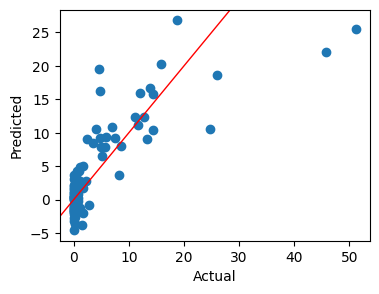

In [11]:
plt.figure(figsize=(4,3))
plt.scatter(y_test,y_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.axline((0,0),(1,1), linewidth=1, color='r')

In [ ]:
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)

def print_accuracy(f):
    print("Decision Tree squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    
print_accuracy(dtree.predict)

In [ ]:
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=2)
rforest.fit(X_train, y_train)

def print_accuracy(f):
    print("Random Forest squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))

print_accuracy(rforest.predict)

In [ ]:
x_model = xgboost.XGBRegressor()
x_model.fit(X_train, y_train)

def print_accuracy(f):
    print("XGBoost squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))

print_accuracy(x_model.predict)